## 库导入

In [1]:
import pandas as pd
import numpy as np
import os

## 文件解析

主要任务是将所有.csv文件拼接在一起，从而形成一个完整的数据集，并将该数据集存储为totalData.csv

In [2]:
'''
fileConcatnate用于对所有csv文件实现解析，合并成一个大的csv文件
'''
def fileConcatenate():
    # 要处理的csv文件的根路径
    root_path = '../../DataSet/CSV'

    # 根路径下的文件夹名称
    root_dir = os.listdir(root_path)

    # 先读入第一个csv文件作为初始的df
    df = pd.read_csv(f'../../DataSet/CSV/SMSmalware/Jifake/08_10_2017-ps-jifake-F-Secure-0a6bd6d44fc7865847c5cc521be5edd0.pcap_ISCX.csv')

    for d1 in root_dir:
        # 避免对.DS_Store进行处理
        if d1[0] == '.':
            continue
        layer1_path = root_path + '/' + d1
        next_dir = os.listdir(layer1_path)
        for d2 in next_dir:
            if d2[0] == '.':
                continue
            layer2_path = layer1_path + '/' + d2
            next_dir2 = os.listdir(layer2_path)
            for filename in next_dir2:
                if filename == '08_10_2017-ps-jifake-F-Secure-0a6bd6d44fc7865847c5cc521be5edd0.pcap_ISCX.csv':
                    continue
                file_path = layer2_path + '/' + filename
                df2 = pd.read_csv(file_path)
                df = pd.concat([df, df2])
    df.to_csv('totalData.csv')

#fileConcatenate()

## 数据导入
将完整的数据集通过pandas导入

In [3]:
df = pd.read_csv('totalData.csv')

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (26,48,56,58,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 数据清洗
对列名格式、数据类型、空值、异常值进行处理

### 数据体量与字段查看

In [4]:
# 查看数据集的体量
df.shape

(2616541, 86)

In [5]:
# 查看数据集的基本信息，发现有80+个特征
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616541 entries, 0 to 2616540
Data columns (total 86 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  float64
 4    Destination IP               object 
 5    Destination Port             float64
 6    Protocol                     float64
 7    Timestamp                    object 
 8    Flow Duration                float64
 9    Total Fwd Packets            float64
 10   Total Backward Packets       float64
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [6]:
# 由于csv导入的问题，去掉第一列
df = df.drop('Unnamed: 0', axis=1)

In [7]:
# 统一列名的格式，去除两侧的空格
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616541 entries, 0 to 2616540
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  float64
 3   Destination IP               object 
 4   Destination Port             float64
 5   Protocol                     float64
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

In [8]:
# 将inf替换为nan
df = df.replace([np.inf, -np.inf], np.nan)

In [9]:
# 查看空值
df.isnull().sum()

Flow ID              4
Source IP            0
Source Port          0
Destination IP       0
Destination Port     0
                    ..
Idle Mean           11
Idle Std            11
Idle Max            11
Idle Min            11
Label               11
Length: 85, dtype: int64

In [10]:
# 处理空值，这里空值数量足够少，可以忽略不计，直接删除即可
df.dropna(inplace=True)

# 再次查看空值，发现已经没有空值
df.isnull().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 85, dtype: int64

In [11]:
# 处理数据类型，主要将object转为float64，float64转为int64
df[['Flow IAT Min', 'Packet Length Std', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk']] = df[['Flow IAT Min', 'Packet Length Std', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk']].astype(np.float64)
df[['Source Port', 'Destination Port', 'Protocol']] = df[['Source Port', 'Destination Port', 'Protocol']].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616528 entries, 0 to 2616540
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

## 数据打标
主要根据原始标签，将所有数据分为良性流量（0）和恶意流量（1）两类

In [12]:
# 对Label2进行条件判断，添加一级标签Label1
'''
良性流量（Good/0）包括：良性流量（Benign）
恶意流量（Bad/1）包括：广告软件（Adware）、勒索软件（Ransomware）、恐吓软件（Scareware）、短信恶意软件（SMS Malware）
'''
def label1(x):
    if x['Label'] == 'BENIGN':
        return 0
    else:
        return 1
df.loc[:, 'Label1'] = df.apply(label1, axis=1)

In [13]:
# 查看标签是否成功标注
df.sample(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label1
349868,180.149.136.194-10.42.0.42-80-35951-6,10.42.0.42,35951,180.149.136.194,80,6,21/06/2017 06:18:38,266261.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
1805950,10.42.0.211-91.190.218.52-54219-12350-6,91.190.218.52,12350,10.42.0.211,54219,6,29/06/2017 09:24:49,3165.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_FAKEJOBOFFER,1
2046914,10.42.0.151-47.93.77.222-58840-80-6,10.42.0.151,58840,47.93.77.222,80,6,28/06/2017 09:04:50,32199.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_FAKEAPPAL,1
239077,10.42.0.151-104.244.42.2-44393-443-6,10.42.0.151,44393,104.244.42.2,443,6,17/06/2017 10:16:57,10914209.0,10.0,7.0,...,260823.0,0.0,260823.0,260823.0,10653386.0,0.0,10653386.0,10653386.0,BENIGN,0
1652349,10.42.0.151-54.192.37.43-40459-80-6,10.42.0.151,40459,54.192.37.43,80,6,22/08/2017 12:16:48,80331.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_WANNALOCKER,1


## 数据分析
主要分析不同标签占比情况

In [14]:
# 对原始标签进行数据分析
df['Label'].value_counts(normalize=True, sort=True)

BENIGN                       0.462525
ADWARE_GOOLIGAN              0.035838
ADWARE_FEIWO                 0.021644
SCAREWARE_ANDROIDDEFENDER    0.021571
RANSOMWARE_SVPENG            0.020700
RANSOMWARE_PORNDROID         0.017612
SCAREWARE_FAKEAPPAL          0.017031
RANSOMWARE_KOLER             0.017028
SMSMALWARE_NANDROBOX         0.017014
ADWARE_EWIND                 0.016577
SCAREWARE_AVFORANDROID       0.016223
SCAREWARE_AVPASS             0.015584
SCAREWARE_FAKEAV             0.015321
RANSOMWARE_RANSOMBO          0.015234
SMSMALWARE_PLANKTON          0.015198
ADWARE_DOWGIN                0.015166
RANSOMWARE_CHARGER           0.015116
ADWARE_SHUANET               0.015009
ADWARE_KEMOGE                0.014818
RANSOMWARE_SIMPLOCKER        0.013889
ADWARE_YOUMI                 0.013772
SCAREWARE_FAKEAPP            0.013253
SMSMALWARE_BIIGE             0.012871
SMSMALWARE_SMSSNIFFER        0.012848
SCAREWARE_FAKETAOBAO         0.012726
RANSOMWARE_WANNALOCKER       0.012498
ADWARE_KOODO

In [15]:
# 对一级标签进行分析
df['Label1'].value_counts(normalize=True, sort=True)

1    0.537475
0    0.462525
Name: Label1, dtype: float64

In [16]:
# 对所有特征的方差进行分析
df.std().sort_values()

ECE Flag Count          0.000000e+00
Fwd URG Flags           0.000000e+00
Bwd URG Flags           0.000000e+00
Bwd Avg Bulk Rate       0.000000e+00
Bwd Avg Packets/Bulk    0.000000e+00
                            ...     
Fwd IAT Total           1.857330e+07
Flow Duration           2.201306e+07
Fwd Header Length.1     1.796069e+08
Fwd Header Length       1.796069e+08
Bwd Header Length       3.129020e+08
Length: 81, dtype: float64

## 特征预处理

### 特征选择

In [17]:
# 首先，方差为0的特征不具有任何区分性，这里予以剔除
df1 = df.drop(["ECE Flag Count",
"Fwd URG Flags",
"Bwd URG Flags",
"Bwd Avg Bulk Rate",
"Bwd Avg Packets/Bulk",
"Bwd Avg Bytes/Bulk",
"Fwd Avg Bulk Rate",
"Fwd Avg Packets/Bulk",
"Fwd Avg Bytes/Bulk",
"Bwd PSH Flags",
"CWE Flag Count",
"RST Flag Count"], axis=1)

In [18]:
# 其次，这里仅采用Label1作为分类标签，对Label予以剔除
df = df.drop(["Label"], axis=1)

In [19]:
# Flow_ID、时间戳Timestamp、源IP地址、目的IP地址在语义上不具备可区分性，予以剔除
df = df.drop(["Flow ID", "Source IP", "Destination IP", "Timestamp"], axis=1)

### 数据集分割

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [22]:
data.sample(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
1137071,80,55827,6,18019.0,1.0,3.0,470.0,0.0,470.0,470.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380725,60899,443,6,66763810.0,19.0,29.0,2166.0,32530.0,564.0,0.0,...,5.0,20.0,2696863.0,0.0,2696863.0,2696863.0,64066488.0,0.0,64066488.0,64066488.0
1545642,38828,80,6,618497.0,3.0,3.0,1454.0,193.0,1454.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551392,42665,80,6,45866530.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660148,1451,53,17,246740.0,1.0,1.0,30.0,83.0,30.0,30.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
target.sample(5)

357845     0
1895079    1
212707     1
863973     0
1495684    1
Name: Label1, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

## 特征变换

### 数据标准化

In [25]:
std = StandardScaler()
x_train1 = std.fit_transform(x_train)
x_test1 = std.fit_transform(x_test)

In [26]:
import matplotlib.pyplot as plt

In [27]:
fea = ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

### 未进行标准化的x_train

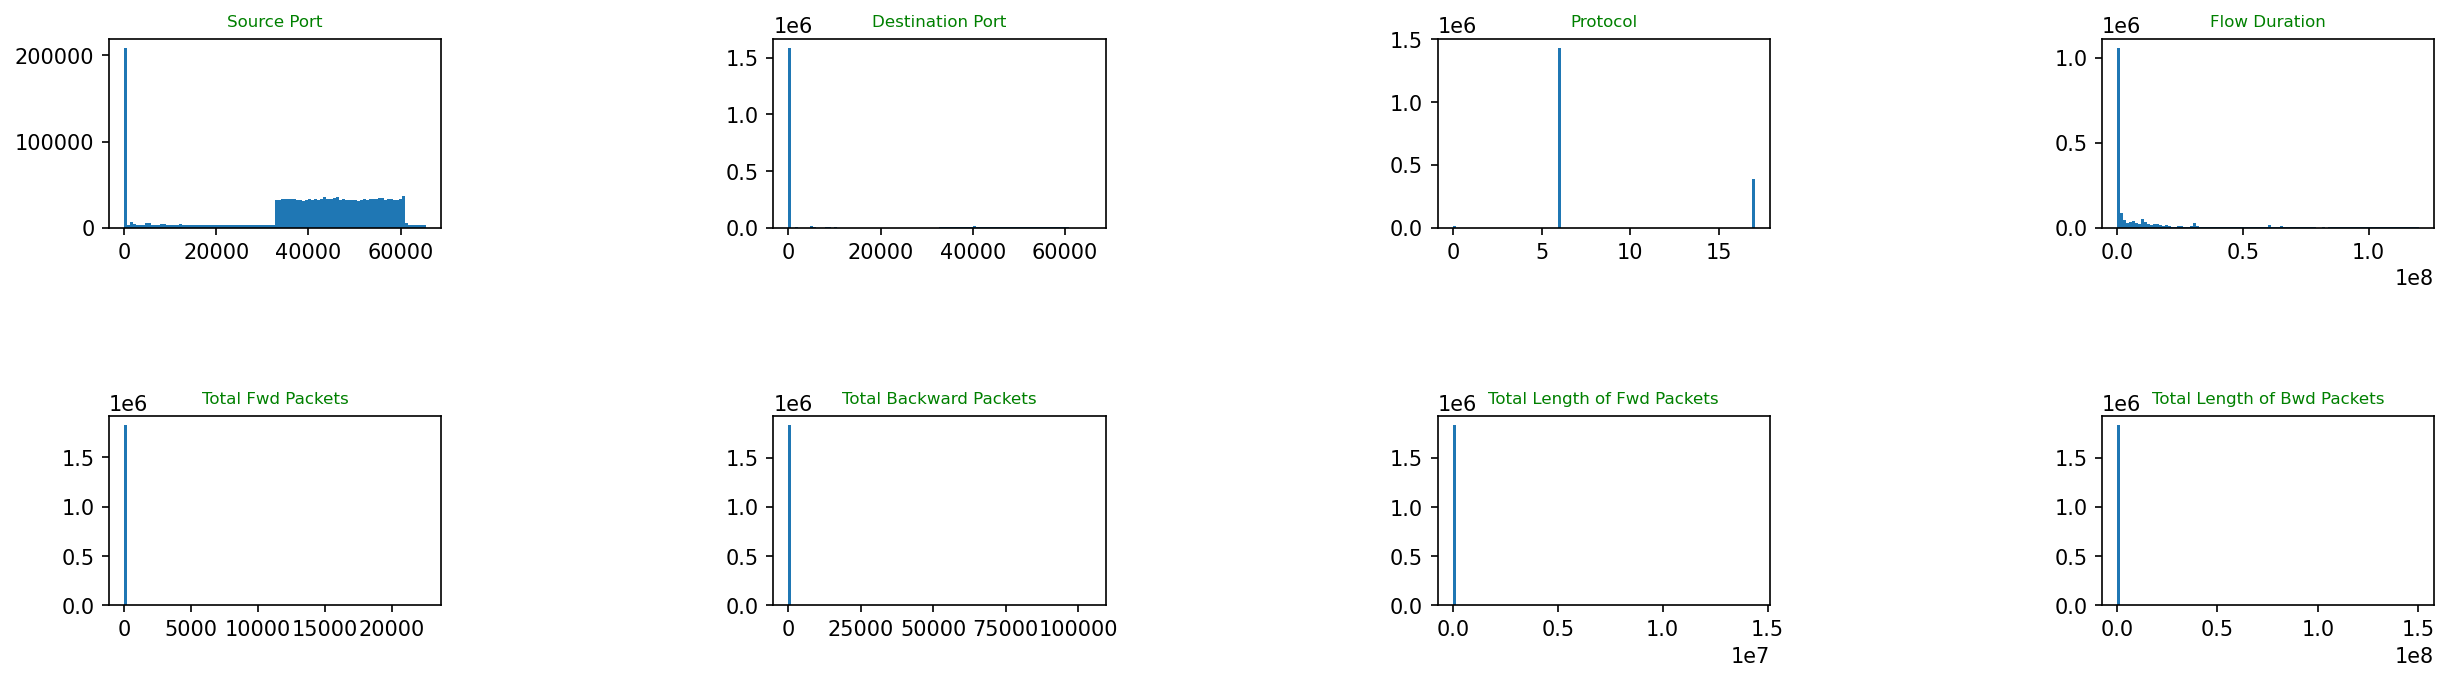

In [28]:
fig = plt.figure(dpi=150)
fig.set_size_inches(20, 5) # 设置宽度和高度，单位为英寸（inch）

for j in range(8):
    ax = fig.add_subplot(2, 4, 1+j)
    num = np.array(x_train[fea[j]])
    plt.hist(num, 100)
    plt.subplots_adjust(wspace=1, hspace=1) 
    ax.set_title("{}".format(fea[j]),color=("green" ),fontsize=8, ha='center') #设置title

### 进行标准化的x_train

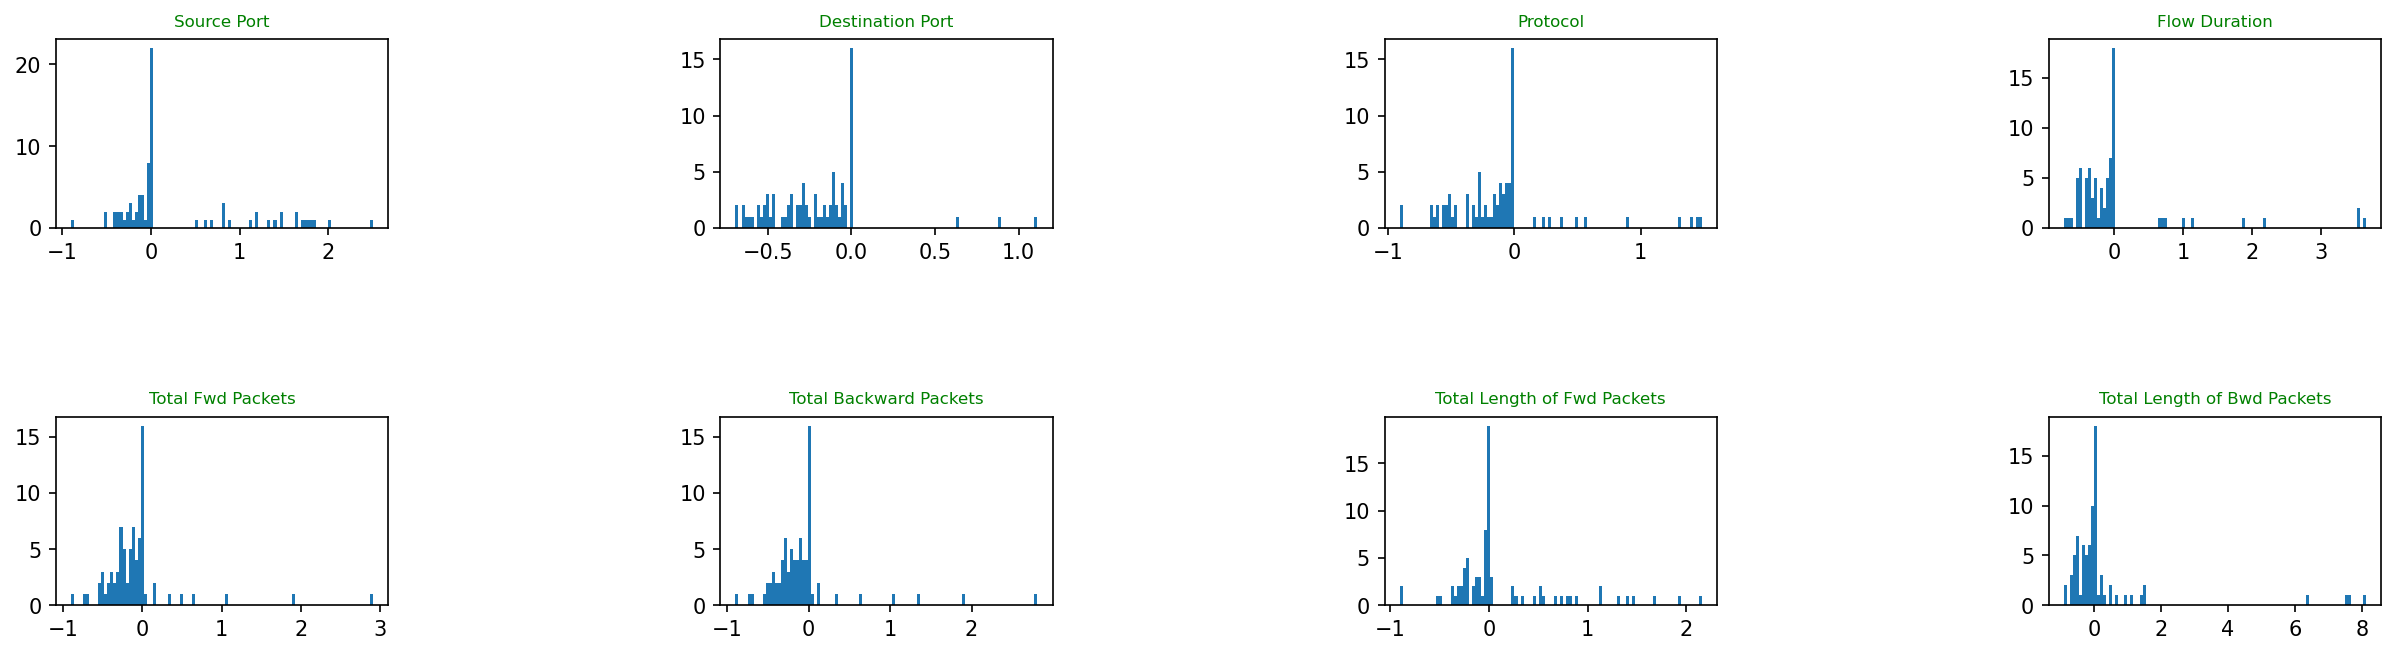

In [30]:
fig = plt.figure(dpi=150)
fig.set_size_inches(20, 5) # 设置宽度和高度，单位为英寸（inch）

for j in range(8):
    ax = fig.add_subplot(2, 4, 1+j)
    num = x_train1[j]
    plt.hist(num, 100)
    plt.subplots_adjust(wspace=1, hspace=1) 
    ax.set_title("{}".format(fea[j]),color=("green" ),fontsize=8, ha='center') #设置title

## 逻辑回归

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score, roc_curve, auc, f1_score

In [37]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
score = lr.score(x_test, y_test)
print(score)

0.5413148967016111


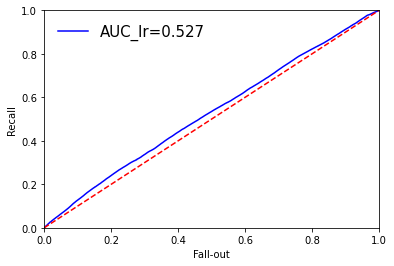

In [41]:
y_test_proba_lr = lr.predict_proba(x_test)
false_positive_rate_lr, recall_lr, thresholds_lr = roc_curve(y_test, y_test_proba_lr[:, 1])  
# AUC指标
roc_auc_lr = auc(false_positive_rate_lr, recall_lr) 
plt.plot(false_positive_rate_lr, recall_lr, color='blue', label='AUC_lr=%0.3f' % roc_auc_lr)  
plt.legend(loc='best', fontsize=15, frameon=False)  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()

In [59]:
y_pred = lr.predict(x_test)
report = classification_report(y_test,y_pred,target_names=["Good","Bad"])
print(report)

              precision    recall  f1-score   support

        Good       0.57      0.03      0.06    363001
         Bad       0.54      0.98      0.70    421958

    accuracy                           0.54    784959
   macro avg       0.55      0.51      0.38    784959
weighted avg       0.55      0.54      0.40    784959



In [60]:
f1_score(y_test, y_pred)

0.6961855378682721

## 决策树

In [48]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier   
from sklearn import ensemble
from sklearn.metrics import roc_curve, auc 

In [49]:
clf = DecisionTreeClassifier()# 载入决策树分类模型
clf = clf.fit(x_train, y_train)   # 决策树拟合，得到模型

In [50]:
score_c = clf.score(x_test, y_test)
print(score_c)

0.6593567307337072


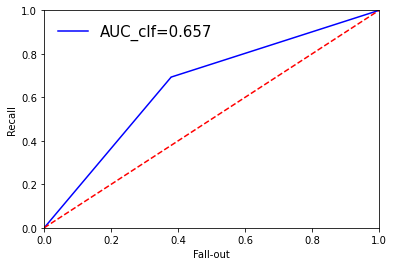

In [51]:
y_test_proba_clf = clf.predict_proba(x_test)
false_positive_rate_clf, recall_clf, thresholds_clf = roc_curve(y_test, y_test_proba_clf[:, 1])  
# 决策树 AUC指标
roc_auc_clf = auc(false_positive_rate_clf, recall_clf) 
plt.plot(false_positive_rate_clf, recall_clf, color='blue', label='AUC_clf=%0.3f' % roc_auc_clf) 
plt.legend(loc='best', fontsize=15, frameon=False)  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()

In [61]:
y_pred = clf.predict(x_test)
report = classification_report(y_test,y_pred,target_names=["Good","Bad"])
print(report)

              precision    recall  f1-score   support

        Good       0.63      0.62      0.63    363001
         Bad       0.68      0.69      0.69    421958

    accuracy                           0.66    784959
   macro avg       0.66      0.66      0.66    784959
weighted avg       0.66      0.66      0.66    784959



In [62]:
f1_score(y_test, y_pred)

0.6859252420536059

## 随机森林

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=37)   
rfc = rfc.fit(x_train, y_train)

In [45]:
score_r = rfc.score(x_test, y_test)

In [46]:
score_r

0.6868830091762754

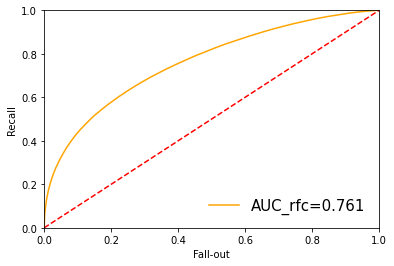

In [47]:
y_test_proba_rfc = rfc.predict_proba(x_test)
false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(y_test, y_test_proba_rfc[:, 1])  
# 随机森林 AUC指标
roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)     
plt.plot(false_positive_rate_rfc, recall_rfc, color='orange', label='AUC_rfc=%0.3f' % roc_auc_rfc)  
plt.legend(loc='best', fontsize=15, frameon=False)  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()

In [63]:
y_pred = rfc.predict(x_test)
report = classification_report(y_test,y_pred,target_names=["Good","Bad"])
print(report)

              precision    recall  f1-score   support

        Good       0.67      0.65      0.66    363001
         Bad       0.70      0.72      0.71    421958

    accuracy                           0.69    784959
   macro avg       0.68      0.68      0.68    784959
weighted avg       0.69      0.69      0.69    784959



In [64]:
f1_score(y_test, y_pred)

0.7115563358463287